<a href="https://colab.research.google.com/github/sruthijasti/FML-Lab/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#understanding K-Means
from sklearn.cluster import KMeans
import numpy as np

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [3]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [4]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

# K-Means Clustering
use the Mall Customer dataset to segment the customers in clusters based on their Age, Annual Income, Spending Score, etc.

In [6]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
#Load the dataset
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

# Objective
Customer segmentation deals with grouping clusters together based on some common patterns within their attributes. To keep the example simple and to visualize the clustering on a 2-D graph we will use only two attributes Annual Income and Spending Score.

# Apply Feature Scaling
Clustering algorithms like K-means require feature scaling of the data as part of data preprocessing to produce good results. This is because clustering techniques use distance calculation between the data points. Hence it is proper to bring data of different units under a common scale.



In [10]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)']);
df_scale.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


# Applying Kmeans with 2 Clusters (K=2)
Let us see how to apply K-Means in Sklearn to group the dataset into 2 clusters (0 and 1). The output shows the cluster (0th or 1st) corresponding to the data points in the dataset.

In [11]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [12]:
km.cluster_centers_

array([[0.37861485, 0.73950929],
       [0.36929553, 0.31163817]])

Finally, let us visualize the results. From the graph, it is evident that there is a scope for data to be grouped into more clusters than only 2. But how to know how many clusters? Let us understand this in the next section.



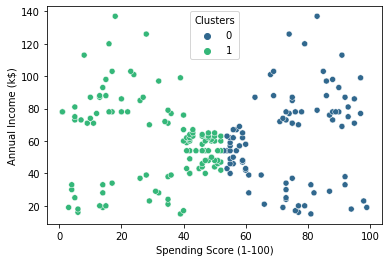

In [13]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')

# Finding Optimum number of Clusters in K Means
The tricky part with K-Means clustering is you do not know in advance that in how many clusters the given data can be divided (hence it is an unsupervised learning algorithm). It can be done with the trial and error method but let us see a more proper technique for this.

**i) Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)**

The Elbow Method is a popular technique for determining the optimal number of clusters. Here, we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for various values of k and choose the k for which WSS first starts to diminish. In the plot of WSS-versus-k, this can be observed as an elbow.


*   The Squared Error for a data point is the square of the distance of a point from its cluster center.
*   The WSS score is the summation of Squared Errors for all given data points. 
*   Distance metrics like Euclidean Distance or the Manhattan Distance can be used.






Distance metrics like Euclidean Distance or the Manhattan Distance can be used.
Continuing with our example, we calculate the WCSS for K=2 to k=12 and calculate the WCSS in each iteration.

In [14]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

Let us now plot the WCSS vs K cluster graph. It can be seen below that there is an elbow bend at K=5 i.e. it is the point after which WCSS does not diminish much with the increase in value of K.



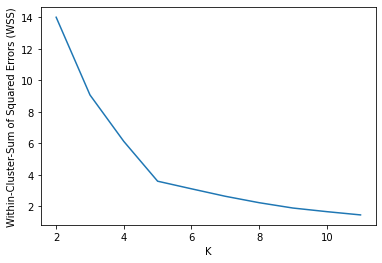

In [15]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

# Applying Kmeans with 5 Clusters (K=5)
Now that we have identified that the optimum value of K is 5

In [16]:
km=KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

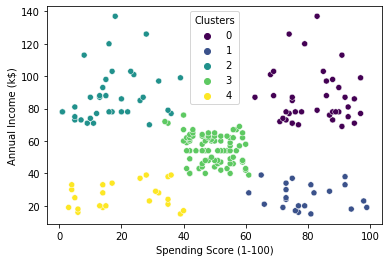

In [17]:
df['Clusters'] = km.labels_

sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')